## Initialize


In [2]:
using Plots
gr()

Plots.GRBackend()

## Lines
A simple line plot of the columns.

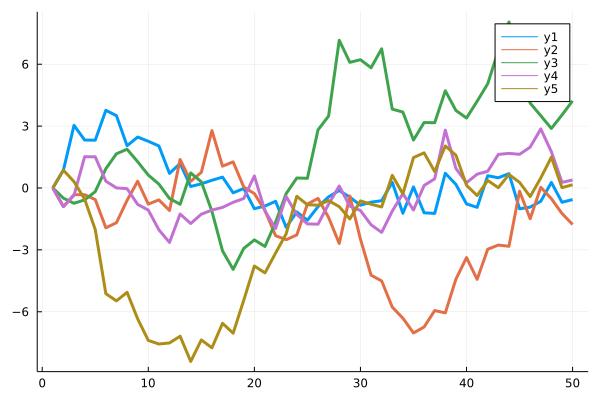

In [3]:
plot(Plots.fakedata(50, 5), w = 3)

## Functions, adding data, and animations
Plot multiple functions. You can also put the function first, or use the form plot(f, xmin, xmax) where f is a Function or AbstractVector{Function}.

Get series data: x, y = plt[i]. Set series data: plt[i] = (x,y). Add to the series with push!/append!.

Easily build animations. (convert or ffmpeg must be available to generate the animation.) Use command gif(anim, filename, fps=15) to save the animation.

In [5]:
p = plot([sin, cos], zeros(0), leg = false, xlims = (0, 2π), ylims = (-1, 1))
anim = Animation()
for x = range(0, stop = 2π, length = 20)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end

## Parametric plots
Plot function pair (x(u), y(u)).

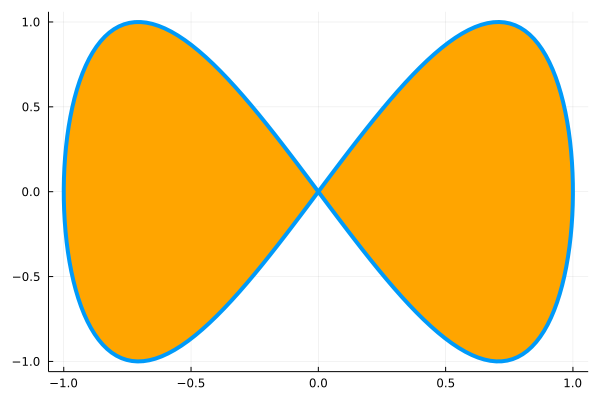

In [6]:
plot(sin, (x->begin
            sin(2x)
        end), 0, 2π, line = 4, leg = false, fill = (0, :orange))

## Colors
Access predefined palettes (or build your own with the colorscheme method). Line/marker colors are auto-generated from the plot's palette, unless overridden. Set the z argument to turn on series gradients.

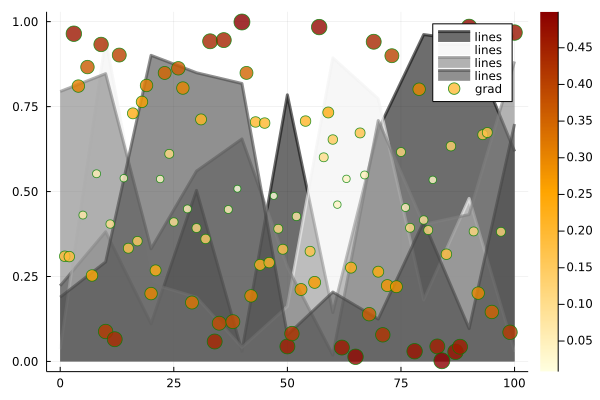

In [7]:
y = rand(100)
plot(0:10:100, rand(11, 4), lab = "lines", w = 3, palette = cgrad(:grays), fill = 0, α = 0.6)
scatter!(y, zcolor = abs.(y .- 0.5), m = (:heat, 0.8, Plots.stroke(1, :green)), ms = 10 * abs.(y .- 0.5) .+ 4, lab = "grad")

## Global
Change the guides/background/limits/ticks. Convenience args xaxis and yaxis allow you to pass a tuple or value which will be mapped to the relevant args automatically. The xaxis below will be replaced with xlabel and xlims args automatically during the preprocessing step. You can also use shorthand functions: title!, xaxis!, yaxis!, xlabel!, ylabel!, xlims!, ylims!, xticks!, yticks!

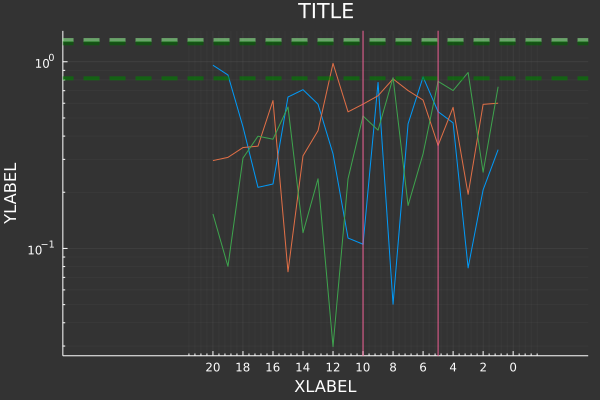

In [8]:
using Statistics
y = rand(20, 3)
plot(y, xaxis = ("XLABEL", (-5, 30), 0:2:20, :flip), background_color = RGB(0.2, 0.2, 0.2), leg = false)
hline!(mean(y, dims = 1) + rand(1, 3), line = (4, :dash, 0.6, [:lightgreen :green :darkgreen]))
vline!([5, 10])
title!("TITLE")
yaxis!("YLABEL", :log10, minorgrid = true)

## Arguments
Plot multiple series with different numbers of points. Mix arguments that apply to all series (marker/markersize) with arguments unique to each series (colors). Special arguments line, marker, and fill will automatically figure out what arguments to set (for example, we are setting the linestyle, linewidth, and color arguments with line.) Note that we pass a matrix of colors, and this applies the colors to each series.



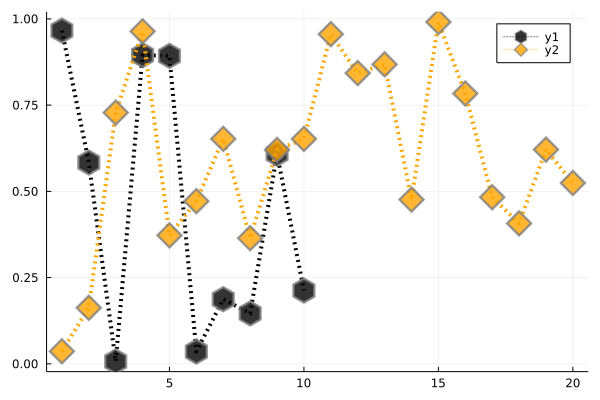

In [15]:
ys = Vector[rand(10), rand(20)]
plot(ys, color = [:black :orange], line = (:dot, 4), marker = ([:hex :d], 12, 0.8, Plots.stroke(3, :gray)))


## Build plot in pieces
Start with a base plot...



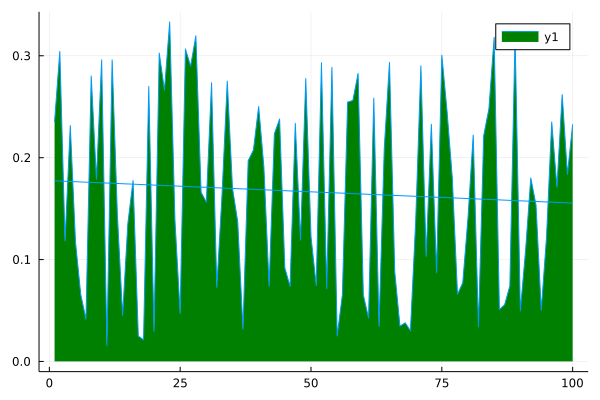

In [16]:
plot(rand(100) / 3, reg = true, fill = (0, :green))

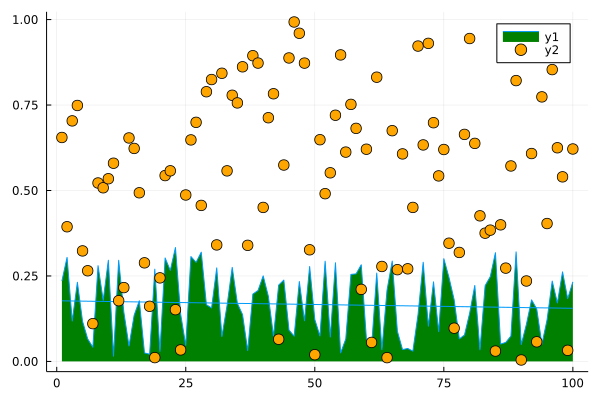

In [17]:
scatter!(rand(100), markersize = 6, c = :orange)


## Histogram2D


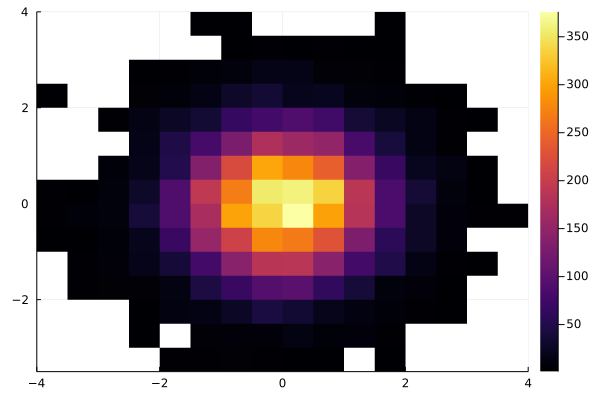

In [18]:
histogram2d(randn(10000), randn(10000), nbins = 20)


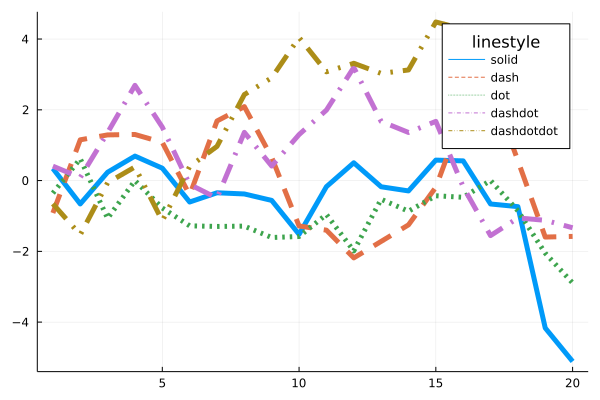

In [20]:
styles = filter((s->begin
                s in Plots.supported_styles()
            end), [:solid, :dash, :dot, :dashdot, :dashdotdot])
styles = reshape(styles, 1, length(styles))
n = length(styles)
y = cumsum(randn(20, n), dims = 1)
plot(y, line = (5, styles), label = map(string, styles), legendtitle = "linestyle")


## Marker types


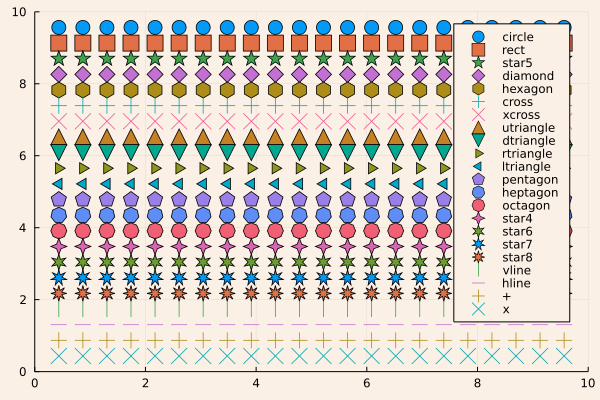

In [21]:
markers = filter((m->begin
                m in Plots.supported_markers()
            end), Plots._shape_keys)
markers = permutedims(markers)
n = length(markers)
x = (range(0, stop = 10, length = n + 2))[2:end - 1]
y = repeat(reshape(reverse(x), 1, :), n, 1)
scatter(x, y, m = markers, markersize = 8, lab = map(string, markers), bg = :linen, xlim = (0, 10), ylim = (0, 10))


## Bar
x is the midpoint of the bar. (todo: allow passing of edges instead of midpoints)



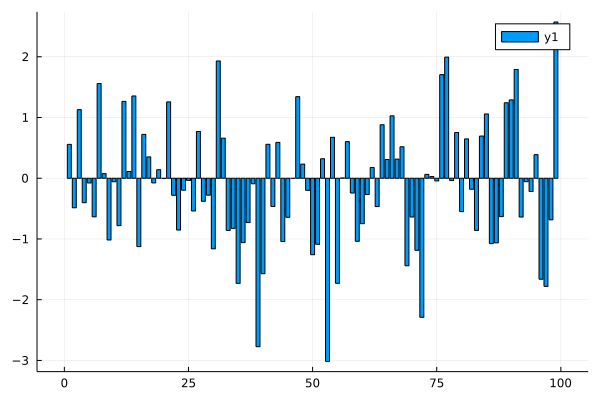

In [22]:
bar(randn(99))

## Histogram


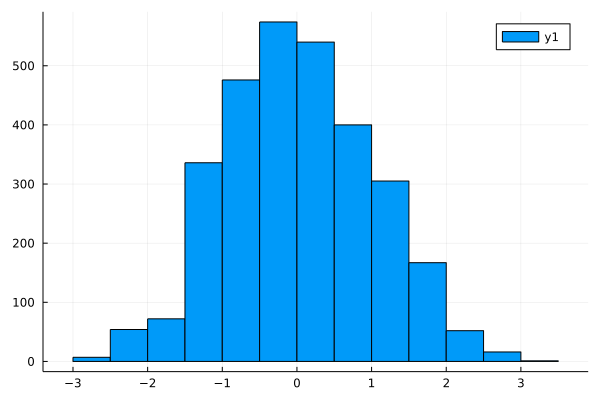

In [23]:
histogram(randn(1000), bins = :scott, weights = repeat(1:5, outer = 200))

## Subplots
Use the layout keyword, and optionally the convenient @layout macro to generate arbitrarily complex subplot layouts.



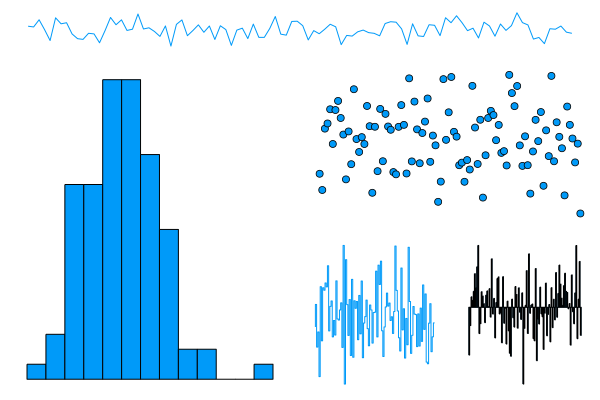

In [24]:
l = @layout([a{0.1h}; b [c; d e]])
plot(randn(100, 5), layout = l, t = [:line :histogram :scatter :steppre :bar], leg = false, ticks = nothing, border = :none)

## Adding to subplots
Note here the automatic grid layout, as well as the order in which new series are added to the plots.

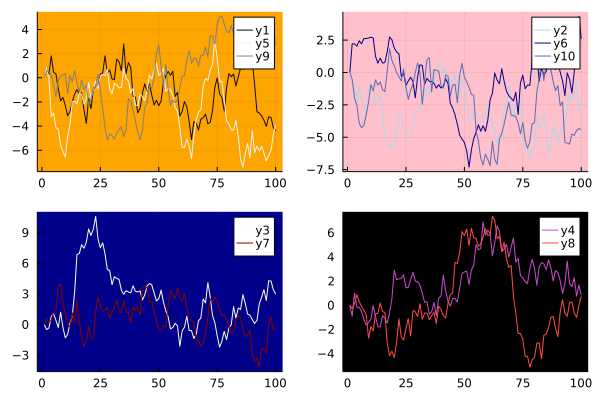

In [25]:
plot(Plots.fakedata(100, 10), layout = 4, palette = cgrad.([:grays :blues :heat :lightrainbow]), bg_inside = [:orange :pink :darkblue :black])

## Open/High/Low/Close
Create an OHLC chart. Pass in a list of (open,high,low,close) tuples as your y argument. This uses recipes to first convert the tuples to OHLC objects, and subsequently create a :path series with the appropriate line segments.



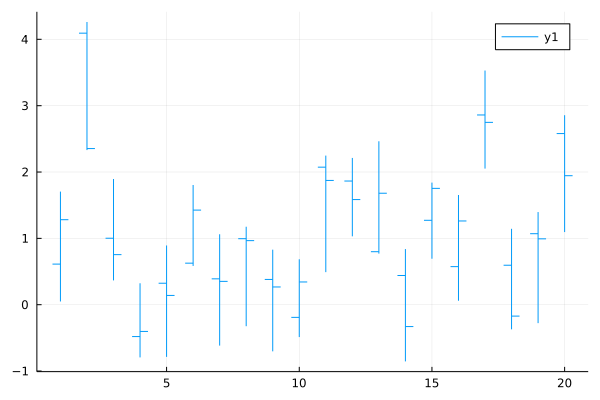

In [26]:
n = 20
hgt = rand(n) .+ 1
bot = randn(n)
openpct = rand(n)
closepct = rand(n)
y = OHLC[(openpct[i] * hgt[i] + bot[i], bot[i] + hgt[i], bot[i], closepct[i] * hgt[i] + bot[i]) for i = 1:n]
ohlc(y)